### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [253]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [254]:
#1
df = pd.read_excel('https://raw.githubusercontent.com/AngelApriliaPutri/Data-Mining/refs/heads/main/Supermarket-December-2017.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [255]:
#2 info
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [256]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
...,...
TP_ADJ,9413
USER,3
TANGGAL,3
JAM,3


In [257]:
# 4
df = df[['KD_SBR', 'TP_TRN', 'KAS', 'TRN_DK', 'GDG', 'GGD', 'KEL', 'ITEM', 'NAMA', 'TGL_TRANS', 'NO_BKT', 'STS_BYR', 'QTY', 'HRG_OLD', 'HRG_PKK', 'HRG_JUL', 'DISC', 'PPN', 'JLH_TRANS', 'KET_TRANS', 'TRNBL', 'FILLER', 'TP_ADJ', 'USER', 'JAM']]
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,TRN_DK,GDG,GGD,KEL,ITEM,NAMA,TGL_TRANS,...,HRG_JUL,DISC,PPN,JLH_TRANS,KET_TRANS,TRNBL,FILLER,TP_ADJ,USER,JAM
0,IN,JUL,6.0,K,A,AREA,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,...,1100.0,0.0,0.0,2200.0,CASH DISCOUNT,N,1.701022e+11,S,MIA,08:12:02
1,IN,JUL,6.0,K,A,AREA,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,...,23000.0,0.0,0.0,23000.0,CASH DISCOUNT,N,1.701029e+11,S,MIA,08:24:51
2,IN,JUL,6.0,K,A,AREA,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,...,9500.0,0.0,0.0,9500.0,CASH DISCOUNT,N,1.701030e+11,S,MIA,08:28:18
3,IN,JUL,6.0,K,A,AREA,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,...,6900.0,0.0,0.0,6900.0,CASH DISCOUNT,N,1.701020e+11,S,MIA,08:28:22
4,IN,JUL,6.0,K,A,AREA,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,...,13500.0,0.0,0.0,13500.0,CASH DISCOUNT,N,1.701020e+11,S,MIA,08:28:20


In [258]:
# 5
df = df.dropna()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,TRN_DK,GDG,GGD,KEL,ITEM,NAMA,TGL_TRANS,...,HRG_JUL,DISC,PPN,JLH_TRANS,KET_TRANS,TRNBL,FILLER,TP_ADJ,USER,JAM
0,IN,JUL,6.0,K,A,AREA,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,...,1100.0,0.0,0.0,2200.0,CASH DISCOUNT,N,1.701022e+11,S,MIA,08:12:02
1,IN,JUL,6.0,K,A,AREA,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,...,23000.0,0.0,0.0,23000.0,CASH DISCOUNT,N,1.701029e+11,S,MIA,08:24:51
2,IN,JUL,6.0,K,A,AREA,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,...,9500.0,0.0,0.0,9500.0,CASH DISCOUNT,N,1.701030e+11,S,MIA,08:28:18
3,IN,JUL,6.0,K,A,AREA,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,...,6900.0,0.0,0.0,6900.0,CASH DISCOUNT,N,1.701020e+11,S,MIA,08:28:22
4,IN,JUL,6.0,K,A,AREA,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,...,13500.0,0.0,0.0,13500.0,CASH DISCOUNT,N,1.701020e+11,S,MIA,08:28:20


In [259]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,0
TP_TRN,0
KAS,0
TRN_DK,0
GDG,0
GGD,0
KEL,0
ITEM,0
NAMA,0
TGL_TRANS,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-260-7446da8a6192>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['JAM']).dt.hour


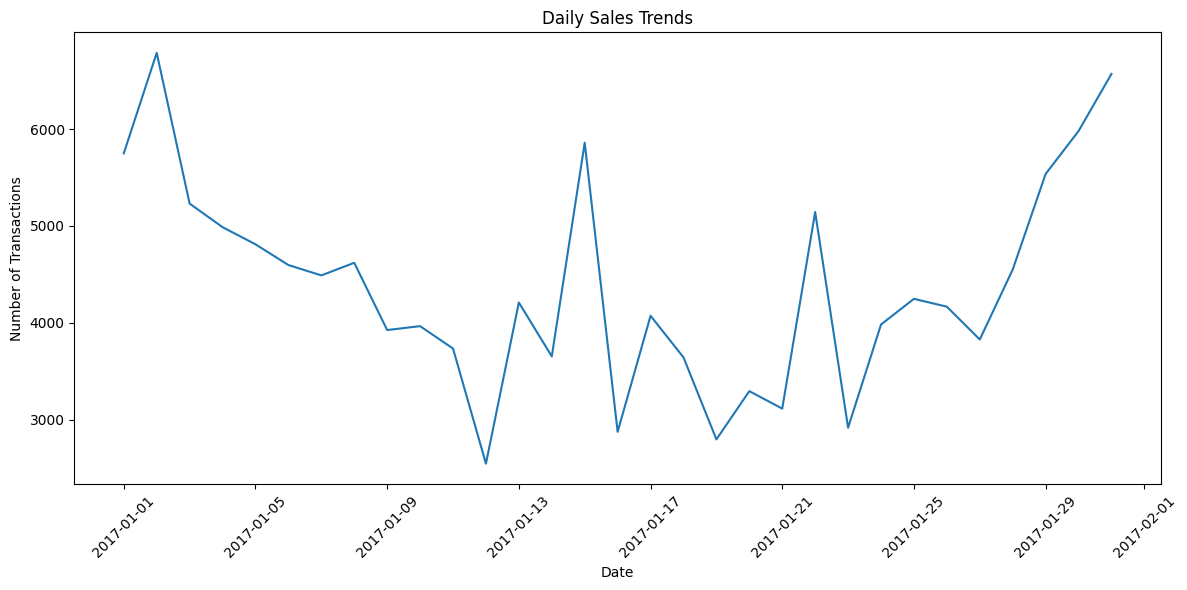

In [260]:
# 6
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'])
df['hour'] = pd.to_datetime(df['JAM']).dt.hour

plt.figure(figsize=(12, 6))
daily_transactions = df.groupby('TGL_TRANS').size()
plt.plot(daily_transactions.index, daily_transactions.values, linestyle='-')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This graph shows the daily sales trends for January 2017. It reveals fluctuations in transaction volumes, with noticeable peaks on certain days, such as early January and toward the end of the month. There are also dips in mid-January, indicating lower activity during that period. These patterns can help identify high-performing days for targeted campaigns and low-performing days for improvement strategies.

In [261]:
# 7
df['month'] = df['TGL_TRANS'].dt.month
df['day'] = df['TGL_TRANS'].dt.day
df['day-name'] = df['TGL_TRANS'].dt.day_name()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,TRN_DK,GDG,GGD,KEL,ITEM,NAMA,TGL_TRANS,...,KET_TRANS,TRNBL,FILLER,TP_ADJ,USER,JAM,hour,month,day,day-name
0,IN,JUL,6.0,K,A,AREA,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,...,CASH DISCOUNT,N,1.701022e+11,S,MIA,08:12:02,8,1,2,Monday
1,IN,JUL,6.0,K,A,AREA,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,...,CASH DISCOUNT,N,1.701029e+11,S,MIA,08:24:51,8,1,2,Monday
2,IN,JUL,6.0,K,A,AREA,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,...,CASH DISCOUNT,N,1.701030e+11,S,MIA,08:28:18,8,1,2,Monday
3,IN,JUL,6.0,K,A,AREA,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,...,CASH DISCOUNT,N,1.701020e+11,S,MIA,08:28:22,8,1,2,Monday
4,IN,JUL,6.0,K,A,AREA,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,...,CASH DISCOUNT,N,1.701020e+11,S,MIA,08:28:20,8,1,2,Monday


In [262]:
# 8
df['day-name'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Monday', 'Sunday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [263]:
# 9
df['day-name'] = pd.Categorical(df['day-name'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

aggregated_data = df.groupby(['hour', 'day-name']).size().unstack(fill_value=0)

aggregated_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-263-683ec0e9bfc0>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df.groupby(['hour', 'day-name']).size().unstack(fill_value=0)


day-name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
8,458,493,311,453,459,317,641
9,1362,1321,857,865,1031,1025,1586
10,1792,1687,1279,1237,1110,1349,2506
11,1727,1483,1328,1260,1039,1034,2241
12,1276,1169,814,731,745,902,1853
13,1248,993,814,679,883,919,1731
14,1435,1089,707,692,688,996,1604
15,1283,1151,865,544,1093,862,1176
16,1339,1611,1169,598,1156,1229,1376


The table shows the hourly distribution of transactions across different days of the week. Peak transaction hours occur during the evening, particularly at 19:00 (7 PM) and 20:00 (8 PM), with Sunday and Tuesday showing the highest transaction counts. This suggests that evenings, especially on weekends, are the busiest times, likely due to after-work shopping or evening routines. Weekends, particularly Sunday, consistently show higher transaction volumes compared to weekdays, with Sunday at 19:00 having the highest number of transactions (3639). Additionally, while morning hours (8 AM–10 AM) see moderate activity, transactions steadily increase towards the afternoon and peak significantly in the evening. Overall, weekdays have relatively fewer transactions, and weekends, especially Sundays, stand out as the busiest days for transactions, particularly in the evening hours.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


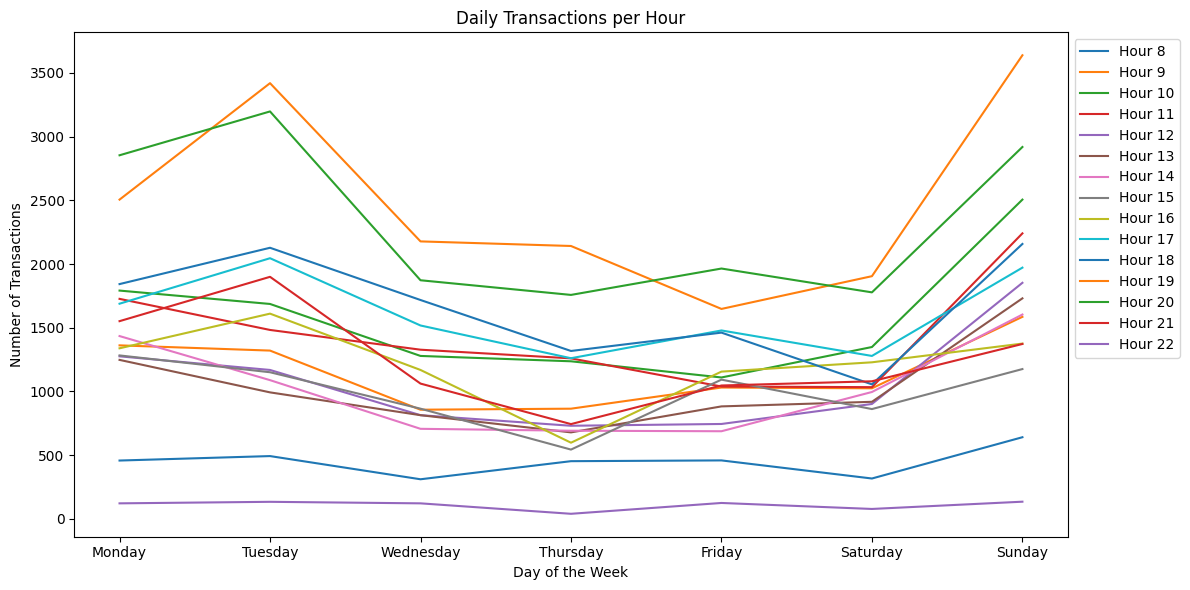

In [264]:
# 10
plt.figure(figsize=(12, 6))

for hour in aggregated_data.index:
    hour_data = aggregated_data.loc[hour]
    plt.plot(hour_data.index, hour_data.values, label=f'Hour {hour}')

plt.title('Daily Transactions per Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-265-2c86b5ca555a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_data = df.groupby(['hour', 'day-name']).size().unstack(fill_value=0)


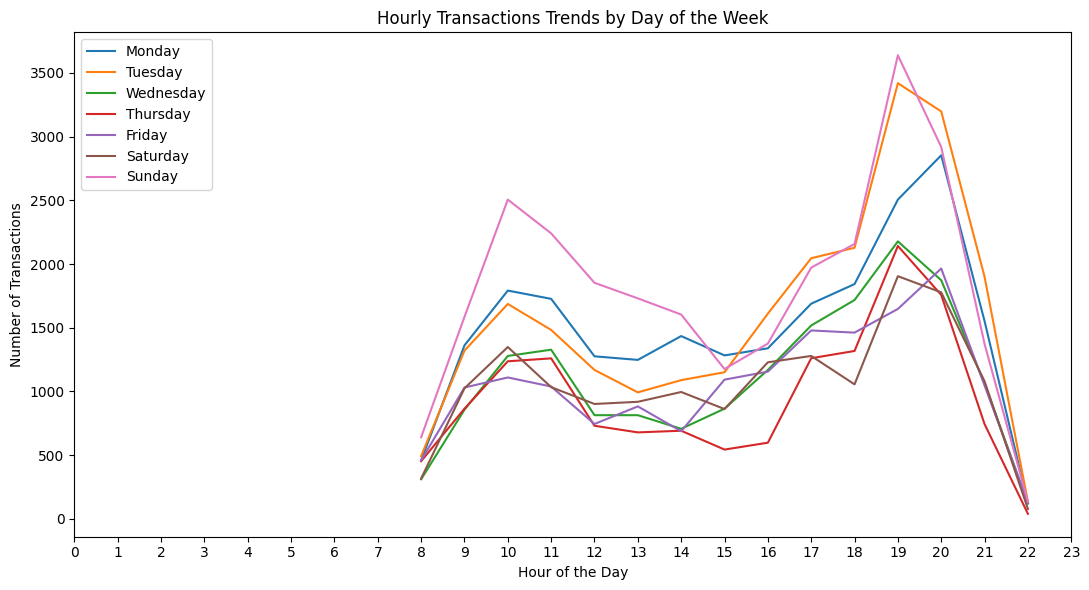

In [265]:
# 11
hour_data = df.groupby(['hour', 'day-name']).size().unstack(fill_value=0)

plt.figure(figsize=(11, 6))
for day in hour_data.columns:
    plt.plot(hour_data.index, hour_data[day], label=day)

plt.title('Hourly Transactions Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend()
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

This visualization illustrates the transaction volume across various days of the week, segmented by hour. The highest transaction volumes occur in the evening, particularly between 6 PM and 8 PM, with Sundays showing the most significant peak. Overall, weekends generally experience more transactions compared to weekdays, with noticeable surges around 10 AM and 7 PM.

In [266]:
# 12
def get_period(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['period_day'] = df['hour'].apply(get_period)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,TRN_DK,GDG,GGD,KEL,ITEM,NAMA,TGL_TRANS,...,TRNBL,FILLER,TP_ADJ,USER,JAM,hour,month,day,day-name,period_day
0,IN,JUL,6.0,K,A,AREA,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,...,N,1.701022e+11,S,MIA,08:12:02,8,1,2,Monday,morning
1,IN,JUL,6.0,K,A,AREA,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,...,N,1.701029e+11,S,MIA,08:24:51,8,1,2,Monday,morning
2,IN,JUL,6.0,K,A,AREA,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,...,N,1.701030e+11,S,MIA,08:28:18,8,1,2,Monday,morning
3,IN,JUL,6.0,K,A,AREA,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,...,N,1.701020e+11,S,MIA,08:28:22,8,1,2,Monday,morning
4,IN,JUL,6.0,K,A,AREA,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,...,N,1.701020e+11,S,MIA,08:28:20,8,1,2,Monday,morning


In [267]:
# 13
df['period_day'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

In [268]:
# 14
morning_hours = df[df['period_day'] == 'morning']['hour']
afternoon_hours = df[df['period_day'] == 'afternoon']['hour']
evening_hours = df[df['period_day'] == 'evening']['hour']
night_hours = df[df['period_day'] == 'night']['hour']

print(f"Morning Hours: {morning_hours.unique()}")
print(f"Afternoon Hours: {afternoon_hours.unique()}")
print(f"Evening Hours: {evening_hours.unique()}")
print(f"Night Hours: {night_hours.unique()}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Morning Hours: [ 8  9 10 11]
Afternoon Hours: [12 13 14 15 16]
Evening Hours: [17 18 19 20]
Night Hours: [21 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


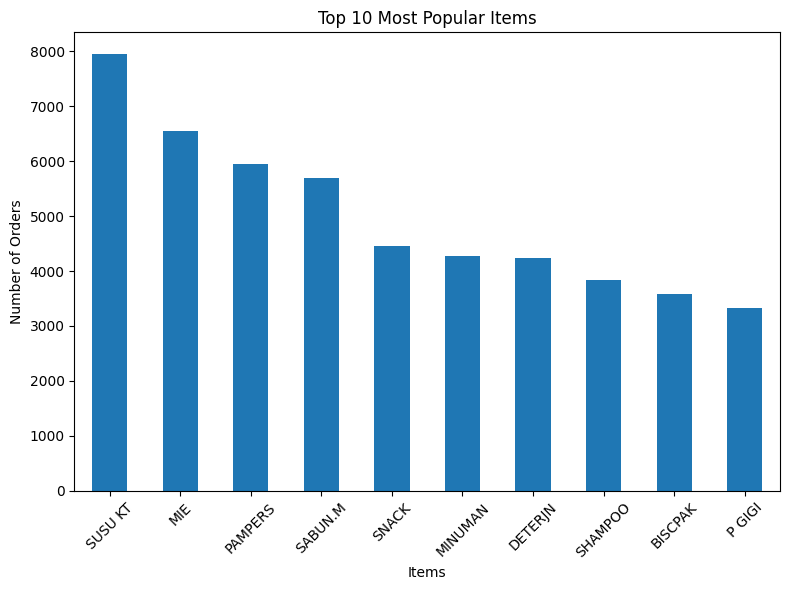

In [269]:
# 15
plt.figure(figsize=(8, 6))
item_counts = df['KEL'].value_counts()
top_10_items = item_counts.head(10)
top_10_items.plot(kind='bar')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-270-015313d757c8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='coolwarm')


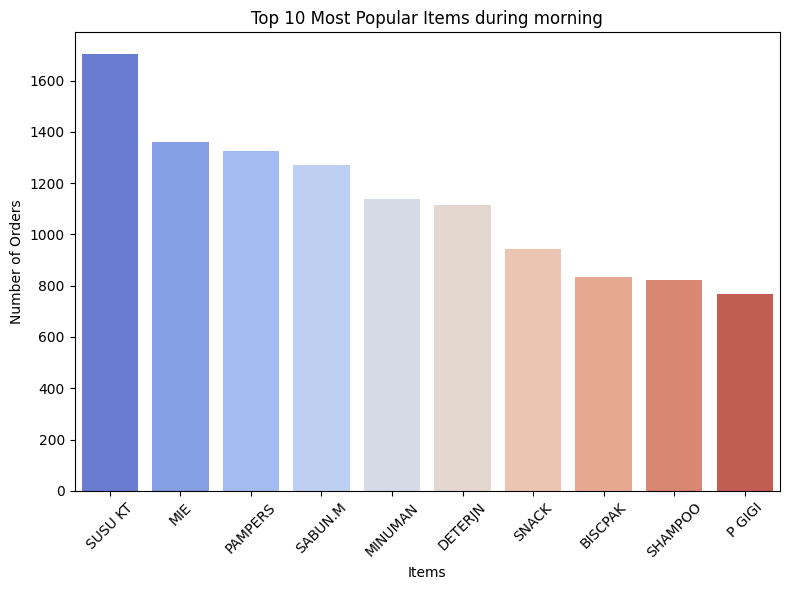

<ipython-input-270-015313d757c8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='coolwarm')


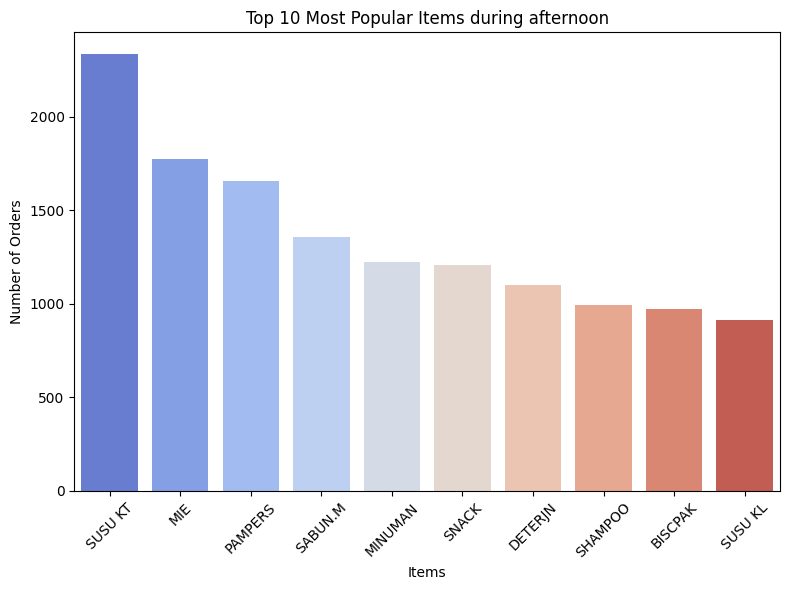

<ipython-input-270-015313d757c8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='coolwarm')


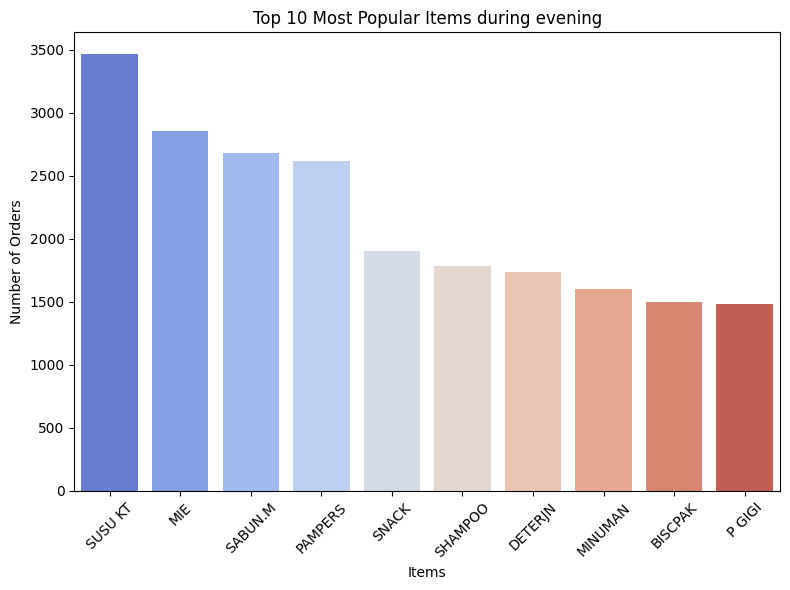

<ipython-input-270-015313d757c8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='coolwarm')


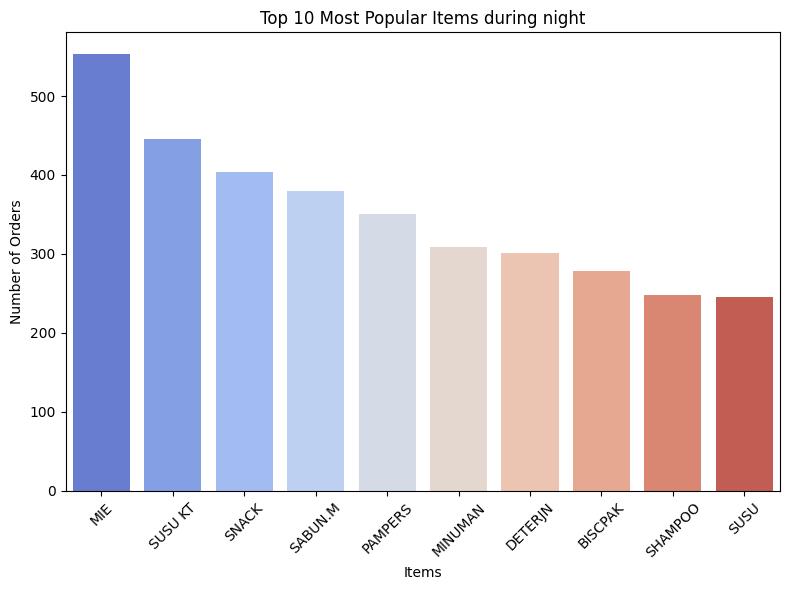

In [270]:
# 16
for period in df['period_day'].unique():
    period_data = df[df['period_day'] == period]
    item_counts = period_data['KEL'].value_counts().nlargest(10)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=item_counts.index, y=item_counts.values, palette='coolwarm')
    plt.title(f'Top 10 Most Popular Items during {period}')
    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


This visualization displays the top 10 best-selling items at various times of the day: morning, afternoon, evening, and night. Milk (SUSU KT) consistently holds the top position during most periods, especially in the morning, afternoon, and evening, indicating its high demand. Instant noodles (MIE) also remain a popular choice throughout the day, particularly during the night when it becomes the best-seller. Other items such as soap (SABUN M), baby products (PAMPERS), and snacks (SNACK) show consistent sales across all time periods, reflecting steady demand for household and convenience items.

In [271]:
# 17
df_encoded = pd.get_dummies(df['KEL'], prefix='', prefix_sep='')
df_encoded = pd.concat([df['NO_BKT'], df_encoded], axis=1)
df_encoded = df_encoded.groupby('NO_BKT').sum()
df_encoded = df_encoded.applymap(lambda x: 1 if x > 0 else 0)

df_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-271-9e006e5c3291>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x > 0 else 0)


,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
010101001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
010101002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [272]:
# 19
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.038597,(AIR.M)
1,0.032876,(ASESORS)
2,0.033584,(B DAPUR)
3,0.063941,(BISCPAK)
4,0.024268,(BTL/DOT)
5,0.032735,(COKLAT)
6,0.027015,(DDORANT)
7,0.085349,(DETERJN)
8,0.029082,(GULA)
9,0.021210,(HBL)


In [273]:
# 20
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCPAK),(SNACK),0.063941,0.068811,0.022031,0.344553,5.007216,0.017631,1.420692,0.854955
1,(SNACK),(BISCPAK),0.068811,0.063941,0.022031,0.320165,5.007216,0.017631,1.376891,0.859426
2,(DETERJN),(MIE),0.085349,0.080393,0.023928,0.280358,3.487346,0.017067,1.277868,0.779804
3,(MIE),(DETERJN),0.080393,0.085349,0.023928,0.297640,3.487346,0.017067,1.302254,0.775602
4,(SOFTENR),(DETERJN),0.043722,0.085349,0.028261,0.646373,7.573331,0.024529,2.586487,0.907642
5,(DETERJN),(SOFTENR),0.085349,0.043722,0.028261,0.331121,7.573331,0.024529,1.429674,0.948949
6,(DETERJN),(SUSU KT),0.085349,0.170159,0.024636,0.288653,1.696371,0.010113,1.166577,0.448812
7,(SUSU KT),(DETERJN),0.170159,0.085349,0.024636,0.144783,1.696371,0.010113,1.069496,0.494681
8,(PAMPERS),(P GIGI),0.142295,0.077646,0.021153,0.148657,1.914538,0.010104,1.083410,0.556929
9,(P GIGI),(PAMPERS),0.077646,0.142295,0.021153,0.272429,1.914538,0.010104,1.178861,0.517893


The data reveals strong associations between certain product pairs, such as P GIGI and SABUN.M, with a high lift (6.010) and confidence (0.536), suggesting a strong co-purchase relationship. Similarly, SOFTENR and DETERJN show a high lift of 7.573 and confidence of 0.646, indicating a strong connection. High leverage and conviction values for these pairs further confirm their strong relationships. Other combinations, like P GIGI and SABUN.M leading to SHAMPOO, also show high metrics, indicating frequent co-occurrence. On the other hand, weaker associations like SUSU KT and DETERJN (lift of 1.696, confidence of 0.288) suggest less reliable connections. Zhang’s Metric also supports the strength of these relationships, with high values for strong pairs like P GIGI and SABUN.M. These insights can guide targeted marketing and bundling strategies, while weaker associations may need further attention.

# CONCLUSION
- Sales Trend in January: Sales experience an initial surge at the beginning of the month, likely driven by New Year’s shopping.
A gradual decline follows during the first two weeks, with a significant dip between January 9-13.
Mid-January sees sharp fluctuations, with notable peaks on January 17 and January 21.
Toward the end of the month, transaction volumes rise steadily, culminating in a peak around January 30-31.

- Transaction Volume by Time of Day: Sundays and evening hours (6 PM–8 PM) consistently show the highest transaction volumes.
Weekends generally have more activity, with significant spikes around 10 AM and 7 PM.
Weekdays see lower sales, particularly after 9 PM.
Tuesday evenings stand out with a considerable increase in transactions, likely due to promotional events.

- Best-Selling Items: Milk (SUSU KT): Remains the top-selling item throughout most of the day (morning, afternoon, evening).
Instant noodles (MIE): Highest demand is during the night, but it remains popular throughout the day.
Snacks (SNACK), Soap (SABUN M), and Baby products (PAMPERS) maintain consistent demand at all times.

- Market Basket Analysis: Strong Product Associations, such as between SOFTENR and DETERJN, and P GIGI and SABUN.M, indicate a solid connection between complementary items, offering clear guidance for strategic product placement. Moderate associations, like MIE and DETERJN or PAMPERS and SHAMPOO, present potential cross-selling opportunities, though not as strongly correlated as the top pairings. These findings suggest a layout strategy that reflects customer buying patterns.

- Placement Suggestions (20/25 points): Pair high-demand complementary products, like SOFTENR and DETERJN, in the cleaning aisle to promote joint purchases.
Group personal care products such as P GIGI and SABUN.M to boost the chances of customers buying both.
For moderately associated items like MIE and DETERJN or PAMPERS and SHAMPOO, consider placing them nearby or offering bundle promotions to encourage cross-selling.
Create themed sections, like "Laundry Essentials" or "Personal Care Must-Haves," to help customers easily find related items and spur impulse buying.